# Bike Sharing Demand
This dataset consists of the number of public bikes rented in Seoul's bike sharing system at each hour. It also includes information about the weather and the time, such as whether it was a public holiday.

## Import modules and data

In [64]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [65]:
# Import data
file = 'data.csv'
df = pd.read_csv(file)
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Cleaning data and feature engineering

In [66]:
# Convert date category to date time
df['Date'] = pd.to_datetime(df['Date'])

In [67]:
# Creating new column 'Week Day'
df['day_of_week'] = df['Date'].dt.day_name()

# Check unique values
df['day_of_week'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day_of_week, dtype: int64

REASON: Day of the week can impact bike sharing demand. In particular, more people could rent bikes on the weekend because more people would be off work. 

In [68]:
# Count how many functioning and non-function days
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [69]:
# Examing the maximum rented bike count for non-functioning days
not_functioning = df['Functioning Day'] == "No"

print(f'The maximum value of a non-functioning day is {df[not_functioning]["Rented Bike Count"].max()}.')

The maximum value of a non-functioning day is 0.


Since the maximum value is 0, I decided to remove non-functioning days from the dataset because they are not adding any value, and these data points could affect the performance of a model.

In [70]:
# Getting the rows that are functioning days
df = df[~not_functioning]

# Confirming that the non-functioning days were dropped
df['Functioning Day'].value_counts()

Yes    8465
Name: Functioning Day, dtype: int64

Since all of the data are function days, the 'Functioning Day' column becomes unneccessary. Thus, drop the the 'Functioning Day' column.

In [71]:
# Dropping 'Functioning Day' column
df.drop(columns=['Functioning Day'], axis=1, inplace=True)

# Confirming column was dropped
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,day_of_week
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Thursday


## Exploratory Data Analysis

In [72]:
# Looking for correlations with 'Rented Bike Count'
corr_matrix = df.corr()
corr_matrix['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count           1.000000
Temperature(C)              0.562740
Hour                        0.425256
Dew point temperature(C)    0.400263
Solar Radiation (MJ/m2)     0.273862
Visibility (10m)            0.212323
Wind speed (m/s)            0.125022
Rainfall(mm)               -0.128626
Snowfall (cm)              -0.151611
Humidity(%)                -0.201973
Name: Rented Bike Count, dtype: float64


Based on the correlation matrix, 'Temperature(C)' and 'Hour' have the highest correlation with 'Rented Bike Count'. 

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

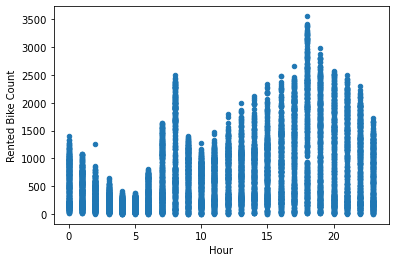

In [77]:
# Visualizing hour and bike count
df.plot(x='Hour', y='Rented Bike Count', kind='scatter')

The rented bike count is the highest at 6pm (18), 7pm (19), and 8am (8)

## Model development

In [78]:
# Import train_test_split and StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Splitting data into training and test set 
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Making a copy of training set
df = train_set.drop('Rented Bike Count', axis=1)
df_labels = train_set['Rented Bike Count'].copy()

#df.groupby('Hour')['Rented Bike Count'].sum().sort_values(ascending=False)

In [79]:
# Dealing with numerics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df_num = df.drop(['Seasons', 'Holiday', 'day_of_week', 'Date'], axis=1)

num_pipeline = Pipeline([
    					('std_scaler', StandardScaler())
						])

df_num_tr = num_pipeline.fit_transform(df_num)

In [7]:
# Dealing with text

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#df_cat = df[['Seasons', 'Holiday', 'day_of_week']]

#ordinal_encoder = OrdinalEncoder()
#df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
#df_cat_encoded[:10]

In [8]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ['Seasons', 'Holiday', 'day_of_week']

full_pipeline = ColumnTransformer([
    			('num', num_pipeline, num_attribs),
    			('cat', OrdinalEncoder(), cat_attribs),
			])

df_prepared = full_pipeline.fit_transform(df)

In [9]:
# Creating Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [10]:
# Testing model on training set
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [11]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

df_predictions = lin_reg.predict(df_prepared)
lin_rmse = np.sqrt(MSE(df_labels, df_predictions))
lin_rmse

lin_scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean()

440.3041388709259

In [12]:
# Decision Tree Regressor
#from sklearn.tree import DecisionTreeRegressor

#tree_reg = DecisionTreeRegressor()
#tree_reg.fit(df_prepared, df_labels)

#df_predictions = tree_reg.predict(df_prepared)
#tree_rmse = np.sqrt(MSE(df_labels, df_predictions))

#tree_rmse

In [13]:


#scores = cross_val_score(tree_reg, df_prepared, df_labels, scoring='neg_mean_squared_error', cv=10)
#tree_rmse_scores = np.sqrt(-scores)
#tree_rmse_scores.mean()

In [14]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(max_features=10, n_estimators=35)
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores.mean()

219.4843833158965

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    		{'n_estimators': [60, 80, 100], 'max_features': [10]},
    		{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(df_prepared, df_labels)

#grid_search.best_estimator_

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=10, n_estimators=35),
             param_grid=[{'max_features': [10], 'n_estimators': [60, 80, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [16]:
# Displaying importance scores
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32657011864453717, 'Temperature(C)'),
 (0.31012810034879174, 'Hour'),
 (0.09890672251551086, 'Humidity(%)'),
 (0.07922295178385166, 'Solar Radiation (MJ/m2)'),
 (0.05669276133731568, 'Seasons'),
 (0.04013300055954928, 'Rainfall(mm)'),
 (0.030915851555071965, 'Dew point temperature(C)'),
 (0.018242320922328043, 'Visibility (10m)'),
 (0.01764019063247739, 'day_of_week'),
 (0.01751996087541447, 'Wind speed (m/s)'),
 (0.002761651953375338, 'Holiday'),
 (0.0012663688717764238, 'Snowfall (cm)')]

In [17]:
# Evaluating the test set
final_model = grid_search.best_estimator_

X_test = test_set.drop('Rented Bike Count', axis=1)
y_test = test_set['Rented Bike Count'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

222.05075110447717

In [18]:
# 95% confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([201.76376991, 240.63344174])

[Source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) of dataset. 

**Citations**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Compare the average number of bikes rented by the time of day (morning, afternoon, and evening) across the four different seasons.
- 📊 **Visualize**: Create a plot to visualize the relationship between temperature and the number of bikes rented. Differentiate between seasons within the plot.
- 🔎 **Analyze**: Which variables correlate most with the number of bikes rented, and how strong are these relationships?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

A bike-sharing startup has just hired you as their data analyst. The business is scaling quickly, but the demand fluctuates a lot. This means that there are not enough usable bikes available on some days, and on other days there are too many bikes. If the company could predict demand in advance, it could avoid these situations.

The founder of the company has asked you whether you can predict the number of bikes that will be rented based on information such as predicted weather, the time of year, and the time of day.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._